
---

# Project Title: Predicting Health Insurance Price for Individuals and Families

## Introduction

**Background:**
In today's world, health insurance is a crucial component of financial planning and well-being. However, determining the actual health insurance cost for an individual or a family can be a complex task influenced by various factors such as age, family size, and underlying health conditions. To address this challenge, our project embarks on a journey to provide a data-driven solution for estimating health insurance costs.

**Project Objective:**
The primary objective of this project is to develop a predictive model that can accurately forecast health insurance costs for prospective customers. To achieve this, we have partnered with an insurance company that has already gathered a substantial dataset, containing the necessary information for data analysis and machine learning tasks.

**The Challenge:**
Health insurance costs are not set in stone and can vary significantly from one person or family to another. To arrive at a fair and personalized insurance premium, it's crucial to consider a wide range of variables, including demographic factors, lifestyle choices, and medical history. Traditional methods have often been imprecise in estimating these costs, which is where data science and machine learning can make a significant impact.

**Our Role:**
As data scientists, our responsibility is to delve into the insurance company's dataset, perform comprehensive data analysis, and ultimately construct a robust machine learning model. This model will leverage the collected data to predict health insurance costs with a high degree of accuracy. By doing so, we aim to assist our client in offering fair and competitive insurance premiums to their prospective clients.

## Project Phases

**Phase 1: Data Exploration**
- Commencing with a comprehensive examination of the dataset, our primary task is to acquire an in-depth comprehension of the variables and identify potential patterns and correlations.

**Phase 2: Data Preprocessing**
- To render the data amenable to machine learning, we will embark on data cleaning, transformation, and normalization. This encompasses addressing missing data, encoding categorical variables, and standardizing numerical features.

**Phase 3: Feature Selection**
- We will undertake the judicious selection of pertinent features that significantly contribute to precise predictions while eliminating extraneous noise.

**Phase 4: Model Development**
- Leveraging a spectrum of machine learning algorithms, we will engage in the construction of predictive models, fine-tuning them to achieve optimal performance.

**Phase 5: Model Evaluation**
- The models developed will undergo rigorous assessment using pertinent metrics, such as mean absolute error or root mean squared error, to gauge their effectiveness in predicting health insurance costs.

**Phase 6: Deployment**
- Upon achieving a high-performing model, our focus will shift towards deployment, ensuring that it can be effectively utilized for real-time cost predictions for prospective clients.



## Variables in the Dataset

- **age**: Age of the primary beneficiary.
- **sex**: Gender of the insurance contractor (female, male).
- **bmi**: Body Mass Index, providing insight into body weight relative to height.
- **children**: Number of children covered by health insurance (dependents).
- **smoker**: Smoking status (smoker or non-smoker).
- **region**: The beneficiary's residential area in the US (northeast, southeast, southwest, northwest).
- **charges**: Individual medical costs billed by health insurance.

---

**Phase 1: Data Exploration**

# Importing Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("Health_insurance_cost.xlsx")

In [5]:
df.head(10)

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
5,31.0,female,25.740,0,no,southeast,3756.62160
6,46.0,female,33.440,1,no,southeast,8240.58960
7,37.0,female,27.740,3,no,northwest,7281.50560
8,37.0,male,29.830,2,no,northeast,6406.41070
9,60.0,female,25.840,0,no,northwest,28923.13692


In [7]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,BMI,Children,health_insurance_price
count,1310.000000,1315.000000,1338.000000,1336.000000
mean,39.166412,30.638217,1.094918,13268.527719
std,14.055378,6.110302,1.205493,12112.797724
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.210000,0.000000,4744.325050
50%,39.000000,30.305000,1.000000,9382.033000
75%,51.000000,34.580000,2.000000,16604.302645
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

In [10]:
df.dropna(inplace = True)
df.isnull().sum()

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64

In [11]:

categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(exclude=['object']).columns


print("Categorical Columns:")
print(categorical_columns)

print("Numerical Columns:")
print(numerical_columns)

Categorical Columns:
Index(['gender', 'smoking_status', 'location'], dtype='object')
Numerical Columns:
Index(['age', 'BMI', 'Children', 'health_insurance_price'], dtype='object')


---
# Exploratory data analysis :
## Univariate analysis :
### A. Categorical Columns:
#### Gender

<Axes: xlabel='gender', ylabel='count'>

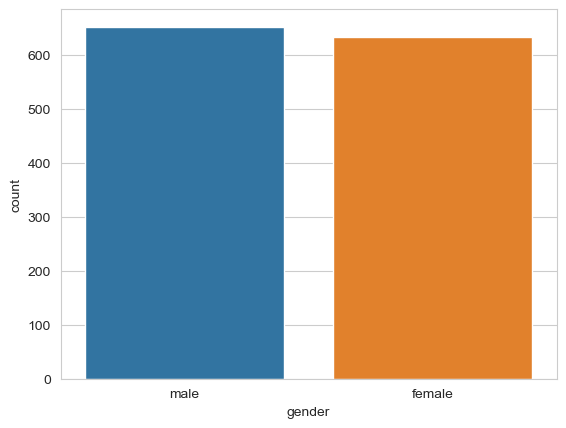

In [13]:
sns.countplot(x="gender", data=df)

(-1.0999995892443966,
 1.0999958544540742,
 -1.0999995677731547,
 1.099997553337643)

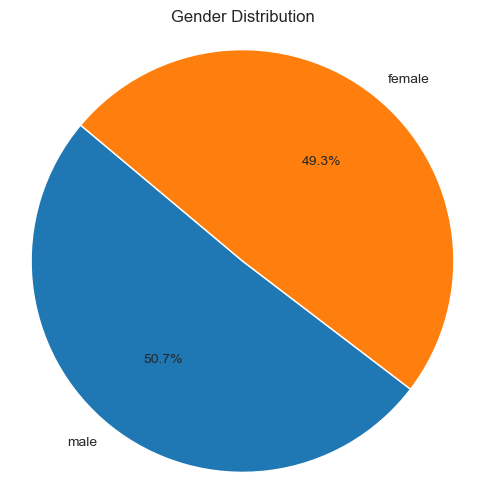

In [14]:
gender_counts = df['gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Gender Distribution")

plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.


---
In this dataset, there are two distinct gender classes: 'F' for female and 'M' for male. Analyzing the provided charts, it's evident that the distribution is approximately same for both.

#### Smoking_status:

<Axes: xlabel='smoking_status', ylabel='count'>

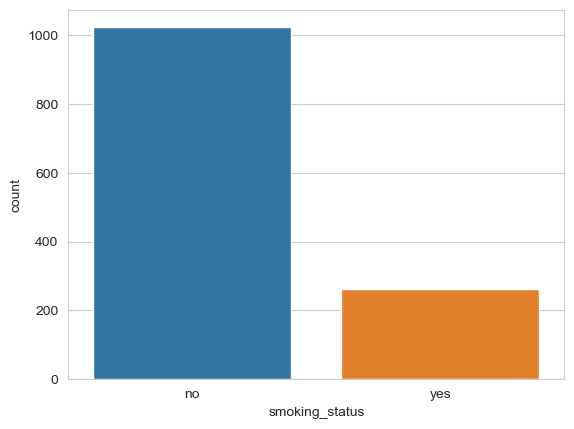

In [15]:
sns.countplot(x="smoking_status", data=df)

---
The majority of individuals in our dataset are non-smokers.

#### Location

<Axes: xlabel='location', ylabel='count'>

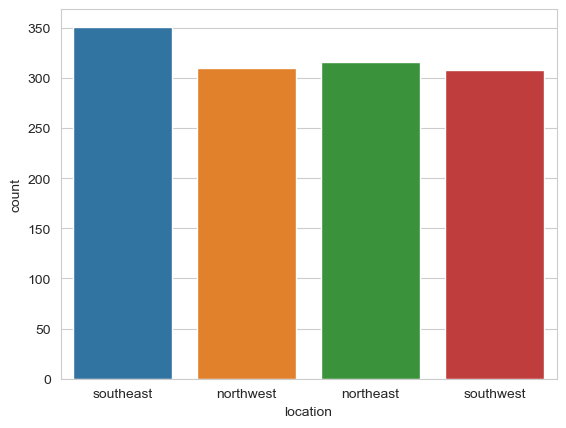

In [17]:

sns.countplot(x="location", data=df)

---
The majority of individuals in our dataset are from southeast area.

### B.Numerical Columns:

In [19]:
print(numerical_columns)

Index(['age', 'BMI', 'Children', 'health_insurance_price'], dtype='object')


#### Age:

<Axes: xlabel='age'>

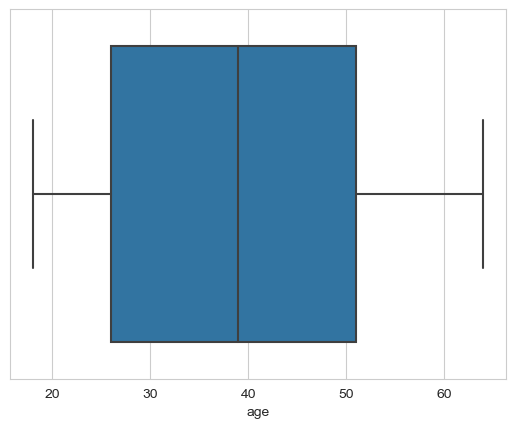

In [20]:
sns.boxplot(x="age",data=df)

---
we can see that there are no outliers present in age column.

#### BMI:

<Axes: xlabel='BMI'>

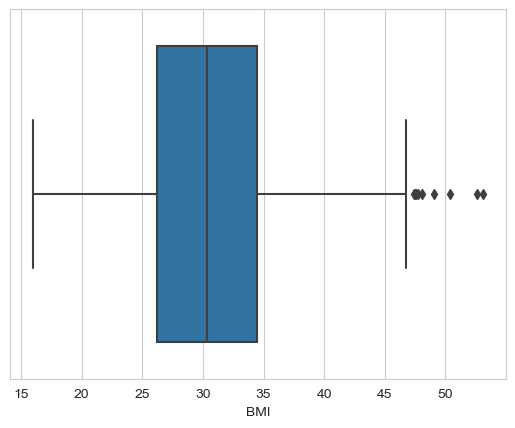

In [26]:
sns.boxplot(x="BMI",data=df)

---
Here we can see, some outliers present in bmi column we need to treat the outliers by replacing the values with mean as the bmi column consists of continuous data.

In [33]:
print("Categorical Columns:")
print(categorical_columns)

print("Numerical Columns:")
print(numerical_columns)

Categorical Columns:
Index(['gender', 'smoking_status', 'location'], dtype='object')
Numerical Columns:
Index(['age', 'BMI', 'Children', 'health_insurance_price'], dtype='object')


## Bivariate analysis :
### A. All Categorical Columns to our Target_variable('health_insurance_price'):
#### i.e 'gender', 'smoking_status', 'location' VS 'health_insurance_price'

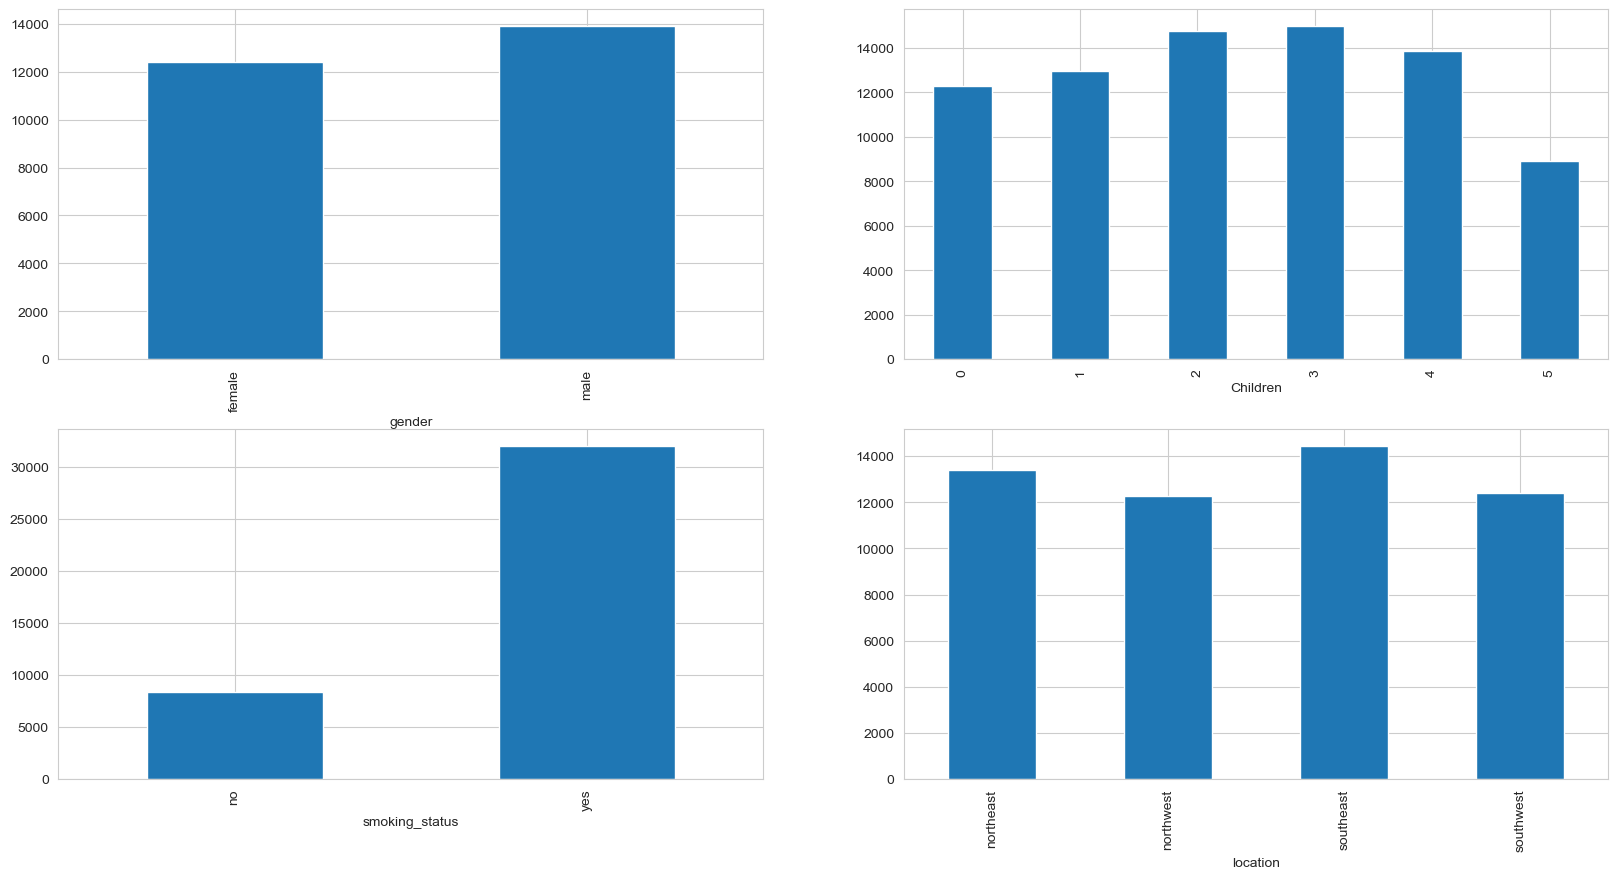

In [36]:
features = ['gender','Children','smoking_status', 'location']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col).mean()['health_insurance_price'].plot.bar()


---

Here are some of the observations which are shown in the above graphs:

- Charges are on the higher side for males as compared to females but the difference is not that much.
- Premium charged from the smoker is around thrice that which is charged from non-smokers.
- Charges are approximately the same in the given four regions.

### A. All Numerical Columns to our Target_variable('health_insurance_price'):
#### i.e 'age', 'BMI', 'Children' VS  'health_insurance_price'

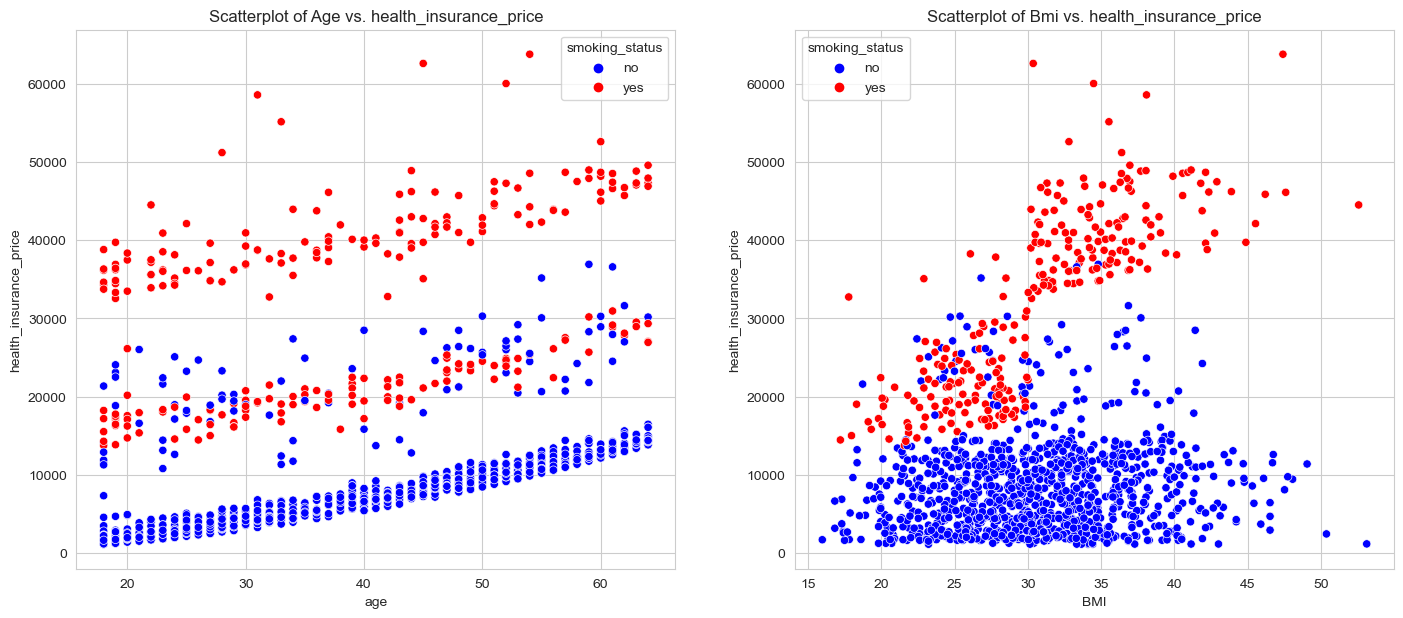

In [39]:
# Defining the features and custom colors
features = ['age', 'BMI']
custom_colors = {'yes': 'red', 'no': 'blue'}  # Define colors for 'smoker' categories

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(17, 7))

# Plotting scatterplots for each feature
for i, col in enumerate(features):
    sns.scatterplot(data=df, x=col, y='health_insurance_price', hue='smoking_status', palette=custom_colors, ax=axes[i])

    # Giving title to the plot 
    axes[i].set_title(f'Scatterplot of {col.capitalize()} vs. health_insurance_price')




----
Here we can see a clear distinction can be observed here between the charges that smokers have to pay as compare to others. Also we can observe that as the age of a person increases premium prices goes up as well.

**Phase 2: Data Preprocessing :**

**Data preprocessing involves cleaning the data by addressing issues such as missing values, incorrect data, improper data formats, duplicate entries, and outliers. In this dataset, we already dealt with missing values and incorrect data. Our primary focus should be on checking for duplicates and identifying the presence of outliers.**

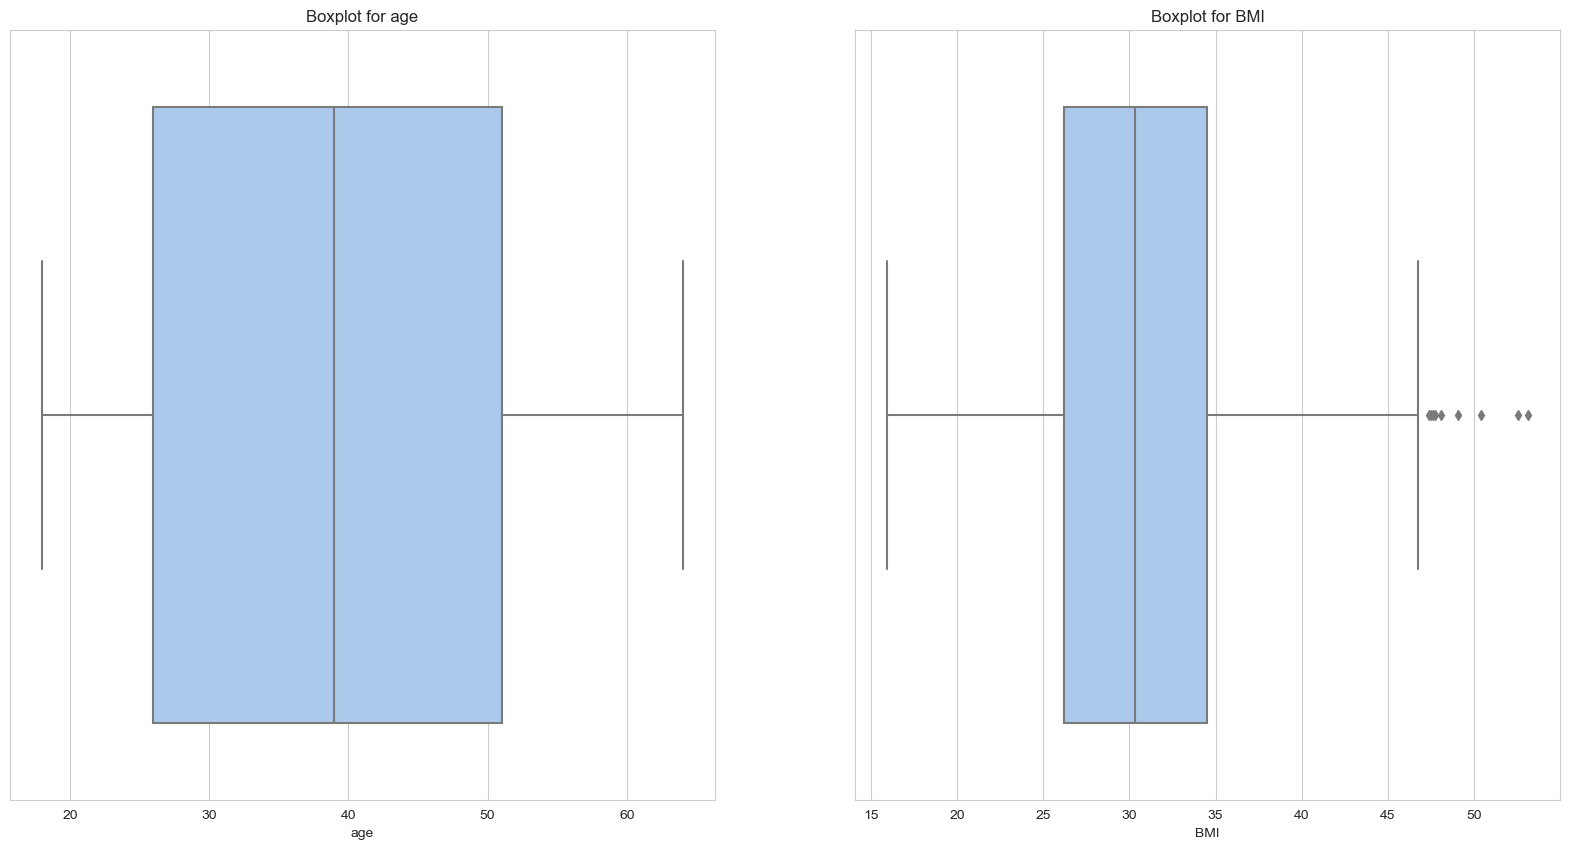

In [41]:

df.drop_duplicates(inplace=True)

features = ['age', 'BMI']
colors = sns.color_palette("pastel")

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

for i, col in enumerate(features):
    sns.boxplot(data=df, x=col, ax=axes[i], palette=colors)
    axes[i].set_title(f'Boxplot for {col}')

plt.show()


-----
Based on our earlier analysis, we can conclude that due to the presence of outliers in the 'BMI' column, it is necessary to address these outliers by replacing the values with the mean, especially since the 'BMI' column contains continuous data.

In [42]:
Q1=df['BMI'].quantile(0.25)
Q2=df['BMI'].quantile(0.5)
Q3=df['BMI'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

13.670000000000005
47.02999999999999


<Axes: >

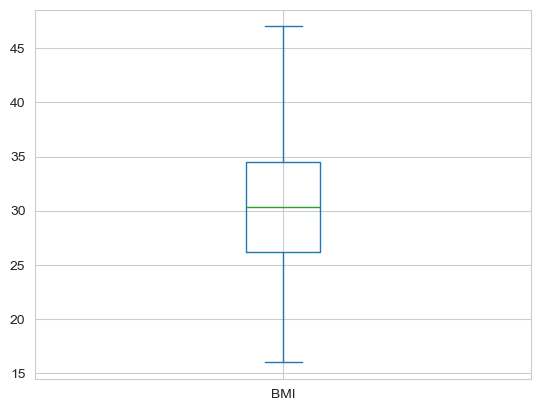

In [43]:
df['BMI'] = df['BMI'].clip(lower=13.6749, upper=47.029)
df['BMI'].plot(kind= 'box')

In [44]:
print(df['BMI'].skew())
print(df['age'].skew())

0.2462231883412559
0.05933647822095845


---
The data in both the 'age' and 'BMI' columns approximately exhibit a Normal distribution, which is advantageous for the model's learning process.

#### Encoding is required for discrete categorical data, specifically for the columns 'gender,' 'smoking_status,' and 'location.'

In [45]:
df.columns

Index(['age', 'gender', 'BMI', 'Children', 'smoking_status', 'location',
       'health_insurance_price'],
      dtype='object')

In [46]:
df['gender']=df['gender'].map({'male':0,'female':1})
df['smoking_status']=df['smoking_status'].map({'yes':1,'no':0})
df['location']=df['location'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})


Now the discrete data is encoded and the data preprocessing and data wrangling part is completed.Now we can go for model development.

In [47]:
df.corr()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
age,1.000000,0.011230,0.113486,0.042180,-0.016693,0.009956,0.304755
gender,0.011230,1.000000,-0.039227,-0.013192,-0.081806,-0.004796,-0.062760
BMI,0.113486,-0.039227,1.000000,0.001283,0.003225,0.154255,0.197316
Children,0.042180,-0.013192,0.001283,1.000000,0.006643,0.002702,0.062092
smoking_status,-0.016693,-0.081806,0.003225,0.006643,1.000000,0.010072,0.789958
location,0.009956,-0.004796,0.154255,0.002702,0.010072,1.000000,0.012892
health_insurance_price,0.304755,-0.062760,0.197316,0.062092,0.789958,0.012892,1.000000


---
Next , Iam extracting the target variable **(health_insurance_price)** from the dataframe and create a new dataframe composed of independent features (also called predictor, aka all the features except the target variable) 

In [49]:
X = df.drop(['health_insurance_price'],axis=1)
y = df['health_insurance_price']

## Model Development :

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1. Linear_Regression:

In [61]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score

model1 = LinearRegression()

model1.fit(X_train,y_train)
print("Training Score: ",model1.score(X_train,y_train))
print("\n")



print("Test Score: ",model1.score(X_test,y_test))
print("\n")


print("CV Score: ",cross_val_score(model1,X,y,cv=5,).mean())

Training Score:  0.760808822073097


Test Score:  0.7248585388441602


CV Score:  0.7501867215429615


---
- While our **Linear Regression model** shows reasonably good performance, we should consider potential overfitting, explore additional features, and evaluate more complex models to see if they provide further improvements in predictive accuracy.

### 2.RandomForestRegressor:

In [62]:
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor model
model2 = RandomForestRegressor(random_state=42)  # we can adjust hyperparameters as needed

# Fit the model to the training data
model2.fit(X_train, y_train)

# Calculate and print the R-squared for the training set
train_r2 = model2.score(X_train, y_train)
print("Random Forest - Training Score: ", train_r2)
print("\n")

# Calculate and print the R-squared for the test set
test_r2 = model2.score(X_test, y_test)
print("Random Forest - Test Score: ", test_r2)
print("\n")

# Calculate and print the mean R-squared for cross-validation (5-fold)
cross_val_r2 = cross_val_score(model2, X, y, cv=5).mean()
print("Random Forest - Cross-Validation Mean R-squared: ", cross_val_r2)


Random Forest - Training Score:  0.9792380454838951


Random Forest - Test Score:  0.8138867571397266


Random Forest - Cross-Validation Mean R-squared:  0.8429644828900249


---
"I've observed that the results are consistently similar when using both `random_state=120` and a range of `n_estimators` values including [10, 40, 50, 98, 100, 120, 150], and I've tested various combinations."

In [72]:
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor model
model2 = RandomForestRegressor(random_state=120)  # we can adjust hyperparameters as needed

# Fit the model to the training data
model2.fit(X_train, y_train)

# Calculate and print the R-squared for the training set
train_r2 = model2.score(X_train, y_train)
print("Random Forest - Training Score: ", train_r2)
print("\n")

# Calculate and print the R-squared for the test set
test_r2 = model2.score(X_test, y_test)
print("Random Forest - Test Score: ", test_r2)
print("\n")

# Calculate and print the mean R-squared for cross-validation (5-fold)
cross_val_r2 = cross_val_score(model2, X, y, cv=5).mean()
print("Random Forest - Cross-Validation Mean R-squared: ", cross_val_r2)


Random Forest - Training Score:  0.9798904145508354


Random Forest - Test Score:  0.8147444754722636


Random Forest - Cross-Validation Mean R-squared:  0.8413461316845042


---
- while Random Forest is a powerful ensemble method, the extremely high training score and the gap between training and test scores suggest a risk of overfitting. Consider addressing model complexity, feature engineering, or trying alternative models to see if we can achieve better generalization and model performance.

### 3.GradientBoostingRegressor:

In [73]:
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score

# Create a GradientBoostingRegressor model
gbmodel = GradientBoostingRegressor(random_state=42)  

# Fit the model to the training data
gbmodel.fit(X_train, y_train)

# Calculate and print the score for the training set
train_r2 = gbmodel.score(X_train, y_train)
print("Gradient Boosting - Training Score: ", train_r2)
print("\n")

# Calculate and print thescore for the test set
test_r2 = gbmodel.score(X_test, y_test)
print("Gradient Boosting - Test Score: ", test_r2)
print("\n")

# Calculate and print the mean score for cross-validation (5-fold)
cross_val_r2 = cross_val_score(gbmodel, X, y, cv=5, scoring='r2').mean()
print("Gradient Boosting - Cross-Validation Mean R-squared: ", cross_val_r2)


Gradient Boosting - Training Score:  0.9129022122365289


Gradient Boosting - Test Score:  0.8329212946608484


Gradient Boosting - Cross-Validation Mean R-squared:  0.8591167116592482


---
**Applying some hyper hyperparameter tuning to GradientBoostingRegressor :**

In [76]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 20, 30, 40, 50],
    'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5]
}

# Create the GradientBoostingRegressor model
gbmodel = GradientBoostingRegressor(random_state=42)

# Create the GridSearchCV object
grid = GridSearchCV(gbmodel, param_grid, scoring="r2", cv=5)

# Fit the grid to your training data
grid.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid.best_params_)

# Create a new model with the best hyperparameters
best_gbmodel = GradientBoostingRegressor(random_state=42,
                                        n_estimators=grid.best_params_['n_estimators'],
                                        learning_rate=grid.best_params_['learning_rate'])

# Fit the model to the training data
best_gbmodel.fit(X_train, y_train)

# Make predictions on the training and testing sets
ypredtrain = best_gbmodel.predict(X_train)
ypredtest = best_gbmodel.predict(X_test)

# Calculate and print the R-squared for the training set
train_r2 = r2_score(y_train, ypredtrain)
print("Training R-squared:", train_r2)

# Calculate and print the R-squared for the test set
test_r2 = r2_score(y_test, ypredtest)
print("Test R-squared:", test_r2)

# Calculate and print the mean R-squared for cross-validation (5-fold)
cross_val_r2 = cross_val_score(best_gbmodel, X, y, cv=5, scoring='r2').mean()
print("Cross-Validation Mean R-squared:", cross_val_r2)


Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 40}
Training R-squared: 0.8928714119297452
Test R-squared: 0.8336336781353888
Cross-Validation Mean R-squared: 0.8650724304287472


###  4.XGBRegressor:

In [78]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

# Create an XGBRegressor model
xgb_model = XGBRegressor(learning_rate=0.1, n_estimators=40, random_state=42)  # Adjust hyperparameters as needed

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Calculate and print the R-squared for the training set
train_r2 = xgb_model.score(X_train, y_train)
print("XGBoost - Training Score:", train_r2)
print("\n")

# Calculate and print the R-squared for the test set
test_r2 = xgb_model.score(X_test, y_test)
print("XGBoost - Test Score:", test_r2)
print("\n")

# Calculate and print the mean R-squared for cross-validation (5-fold)
cross_val_r2 = cross_val_score(xgb_model, X, y, cv=5, scoring='r2').mean()
print("XGBoost - Cross-Validation Mean R-squared:", cross_val_r2)


XGBoost - Training Score: 0.936228663262386


XGBoost - Test Score: 0.8223782126409898


XGBoost - Cross-Validation Mean R-squared: 0.8534200074283943


In [84]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [40, 50, 60, 70],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
}

# Create an XGBRegressor model
xgb_model = XGBRegressor(random_state=42)

# Create a GridSearchCV object with the model and parameter grid
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='r2')

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found by the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best R-squared score from the grid search
best_r2 = grid_search.best_score_
print("Best R-squared Score:", best_r2)

# Use the best model for predictions
best_model = grid_search.best_estimator_
test_r2 = best_model.score(X_test, y_test)
print("XGBoost - Test Score with Best Model:", test_r2)


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Best R-squared Score: 0.8728677656970847
XGBoost - Test Score with Best Model: 0.8350822523867458


---
Given its strong generalization, well-balanced performance, and well-tuned hyperparameters, the **XGBoost model** appears to be a promising candidate for predictive tasks. However, it's essential to consider that it could be computationally more demanding and less interpretable than simpler models. 


In [80]:



feats = pd.DataFrame(data=xgb_model.feature_importances_, index=X.columns, columns=['Importance'])

# Sort the features by importance in descending order
feats = feats.sort_values(by='Importance', ascending=False)

# Print or display the feature importances
print(feats)


                Importance
smoking_status    0.823536
BMI               0.134912
age               0.027118
Children          0.011321
location          0.003113
gender            0.000000


In [82]:

important_features=feats[feats['Importance']>0.01]
important_features

,Importance
smoking_status,0.823536
BMI,0.134912
age,0.027118
Children,0.011321


In [91]:
df.drop(df[['gender','gender']],axis=1,inplace=True)

In [94]:

Xf=df.drop(df[['health_insurance_price']],axis=1)
X=df.drop(df[['health_insurance_price']],axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(Xf,y,test_size=0.2,random_state=42)
finalmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
finalmodel.fit(xtrain,ytrain)
ypredtrain4=finalmodel.predict(xtrain)
ypredtest4=finalmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(finalmodel,X,y,cv=5,).mean())

0.8928411362907434
0.8356617680571132
0.8652659436933987


Final Model:
- Train accuracy : 0.8928411362907434
- Test accuracy  : 0.8356617680571132
- CV Score       : 0.8652659436933987

## Conclusion :

- The XGBoost model has demonstrated the highest level of accuracy among all the models, indicating that its predictions closely align with the actual values when compared to other models.

- Despite using a relatively small dataset, the insights we've gained from these models mirror real-life observations. With a larger dataset, we could uncover even more intricate patterns that reveal the complex relationship between independent features and the premiums charged to buyers.

In [96]:
from pickle import dump
dump(finalmodel,open('insurancemodelf.pkl','wb'))
